In [79]:
%cd /home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/trigger-detection/BGN-ST

/home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/trigger-detection/BGN-ST


In [307]:
import dataloaders.gt_hits_trkvec_masked as ght
import dataloaders.gt_trkvec_masked as gt
import matplotlib.pyplot as plt
import os.path
import numpy as np
from importlib import reload
import glob
from tqdm.notebook import tqdm
from itertools import product
from collections import defaultdict
import random
import pandas as pd

In [184]:
reload(ght)

<module 'dataloaders.gt_hits_trkvec_masked' from '/home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/trigger-detection/BGN-ST/dataloaders/gt_hits_trkvec_masked.py'>

In [185]:
suffix = 'event108077107.npz'
HITS_PREFIX = '/ssd2/giorgian/HFMLNewFiles-hits-1/trigger/1/'
TRACKS_PREFIX = '/ssd2/giorgian/HFML-NewFiles-1/trigger/1/'

In [186]:
e1 = ght.load_graph(os.path.join(HITS_PREFIX, suffix), dphi_max=0.03, dz_max=300)
e2 = gt.load_graph(os.path.join(TRACKS_PREFIX, suffix))

In [187]:
h1 = e1.track_vector.reshape(-1, 3)
h2 = e2.track_vector.reshape(-1, 3)

In [188]:
f = np.load(os.path.join(HITS_PREFIX, suffix), allow_pickle=True)

In [189]:
h3 = f['hits_xyz']

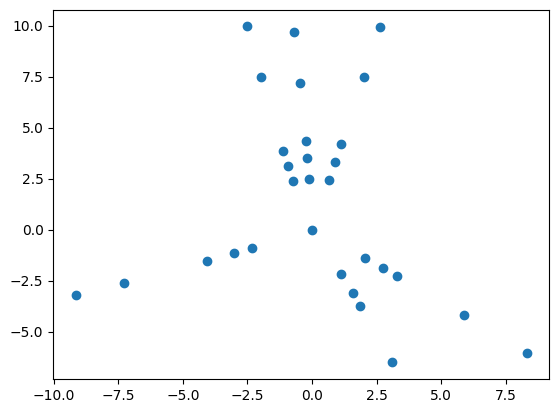

In [162]:
plt.scatter(h2[:, 0], h2[:, 1])

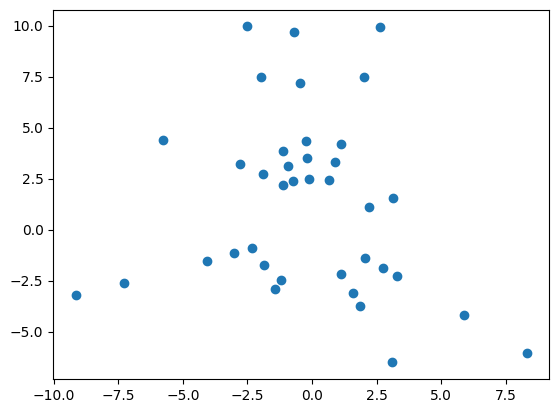

In [210]:
plt.scatter(h3[:, 0], h3[:, 1])

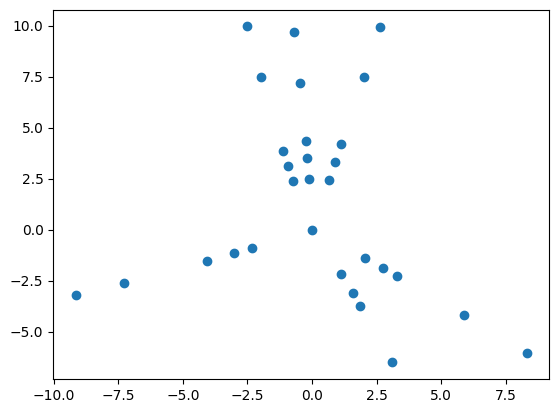

In [164]:
plt.scatter(h1[:, 0], h1[:, 1])

In [165]:
files_trigger = glob.glob(os.path.join(HITS_PREFIX, '*.npz'))
#files_nontrigger = glob.glob(os.path.join(HITS_PREFIX, '../../nontrigger/0/*.npz'))

In [166]:
files = files_trigger
random.shuffle(files)

In [319]:
data = np.array([
    [0.02500529462, 102, 0.885895],
    [0.01488093931, 16, 0.88536],
    [0.01159875097, 155, 0.884555],
    [0.02655539418, 113, 0.88432],
    [0.02458182645, 178, 0.88386],
    [0.01032046659, 48, 0.88263],
    [0.01219335558, 14.22035308, 0.88185],
    [0.03, 200, float('nan')]
])

max_edges = np.zeros(data.shape[0])

In [320]:
dphi = data[:, 0]
dz = data[:, 1]
for file_name in tqdm(files[:N_FILES*10]):
    f = np.load(file_name)
    dphi_f = np.abs(f['dphi'])
    dz_f = np.abs(f['z_slopes'])
    edge_count = np.sum((dphi_f <= dphi[:, None]) & (dz_f <= dz[:, None]), axis=-1)
    max_edges = np.maximum(max_edges, edge_count)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [321]:
results = np.concatenate([data, max_edges[:, None]], axis=-1)

In [322]:
df = pd.DataFrame(results, columns=["$d\phi_{max}$", "$dz_{max}$", "accuracy", "Maximum Edge Candidates"])
df

,$d\phi_{max}$,$dz_{max}$,accuracy,Maximum Edge Candidates
0,0.025005,102.000000,0.885895,1030.0
1,0.014881,16.000000,0.885360,548.0
2,0.011599,155.000000,0.884555,638.0
3,0.026555,113.000000,0.884320,1077.0
4,0.024582,178.000000,0.883860,1022.0
5,0.010320,48.000000,0.882630,556.0
6,0.012193,14.220353,0.881850,463.0
7,0.030000,200.000000,NaN,1171.0


In [202]:
dphi = 0.01488093931
dz = 16
max_edges = 0
for file_name in tqdm(files[:N_FILES]):
    f = np.load(file_name)
    dphi_f = np.abs(f['dphi'])
    dz_f = np.abs(f['z_slopes'])
    edge_count = np.sum((dphi_f <= dphi) & (dz_f <= dz))
    max_edges = max(max_edges, edge_count)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [203]:
max_edges

825

In [181]:
max_edges[-4]

1755.0

In [106]:
max_file = np.load('/ssd2/giorgian/HFMLNewFiles-hits/trigger/1/event110576345.npz')

In [107]:
print(np.sum((np.abs(max_file['dphi']) <= 0.03)&(np.abs(max_file['z_slopes']) <= 200)))

571


In [108]:
max_phi

0.02999991269424671

In [109]:
dphi_max

array([0.     , 0.00125, 0.0025 , 0.00375, 0.005  , 0.00625, 0.0075 ,
       0.00875, 0.01   , 0.01125, 0.0125 , 0.01375, 0.015  , 0.01625,
       0.0175 , 0.01875, 0.02   , 0.02125, 0.0225 , 0.02375, 0.025  ,
       0.02625, 0.0275 , 0.02875, 0.03   ])

In [110]:
np.sum(np.abs(max_file['z_slopes']) <= 200)

1253

In [111]:
4*dphi_max

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 ])

In [112]:
dz_max

array([  0.        ,   8.33333333,  16.66666667,  25.        ,
        33.33333333,  41.66666667,  50.        ,  58.33333333,
        66.66666667,  75.        ,  83.33333333,  91.66666667,
       100.        , 108.33333333, 116.66666667, 125.        ,
       133.33333333, 141.66666667, 150.        , 158.33333333,
       166.66666667, 175.        , 183.33333333, 191.66666667,
       200.        ])

In [292]:
N = 50
dphi_max = np.linspace(0, 0.03, N)
dz_max = np.linspace(0, 200, N)
N_FILES = 10000
DPHI, DZ = np.meshgrid(dphi_max, dz_max, indexing='ij')

In [293]:
results = np.zeros((N, N))
for fname in tqdm(files[:N_FILES]):
    f = np.load(fname)
    phi = np.abs(f['dphi'])
    z = np.abs(f['z_slopes'])
    results = np.maximum(results, np.sum((phi[:, None, None] <= DPHI) & (z[:, None, None] <= DZ), axis=0))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [329]:
n_edges = []
for fname in tqdm(files[:N_FILES*10]):
    f = np.load(fname)
    phi = np.abs(f['dphi'])
    z = np.abs(f['z_slopes'])
    n_edges.append(phi.shape[0])

  0%|          | 0/100000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Edge Candidate Count Distribution for $dφ_{max}=0.03$ and $dz_{max}=200$')

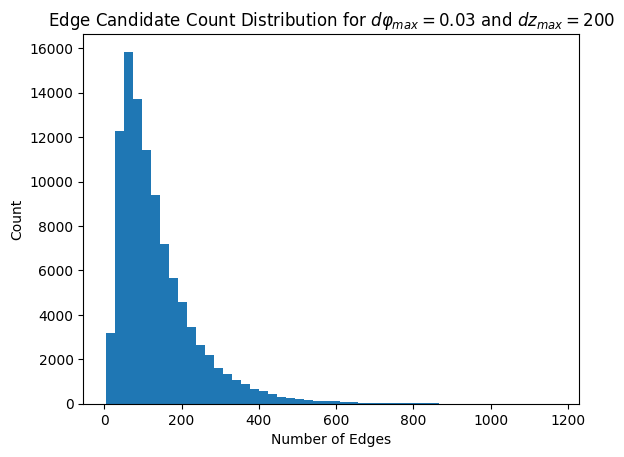

In [331]:
plt.hist(n_edges, bins=50)
plt.xlabel('Number of Edges')
plt.ylabel('Count')
plt.title('Edge Candidate Count Distribution for $dφ_{max}=0.03$ and $dz_{max}=200$')

Text(0.5, 1.0, 'Maximum Number of Edge Candidates')

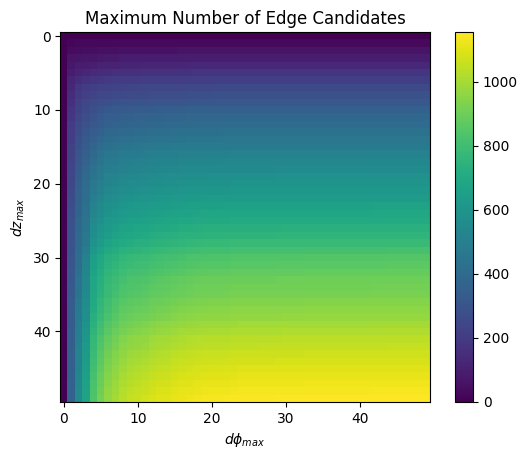

In [294]:
plt.imshow(results)
plt.xlabel('$d\phi_{max}$')
plt.ylabel('$dz_{max}$')
plt.colorbar()
plt.title('Maximum Number of Edge Candidates')

Text(0, 0.5, 'Max Edge Candidates')

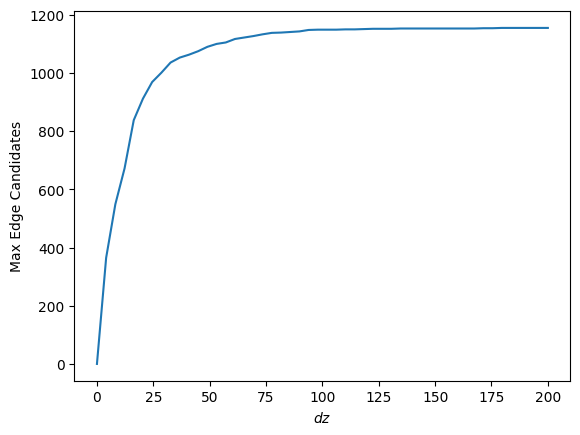

In [296]:
plt.plot(dz_max, results[-1])
plt.xlabel('$dz$')
plt.ylabel('Max Edge Candidates')

Text(0, 0.5, 'Max Edge Candidates')

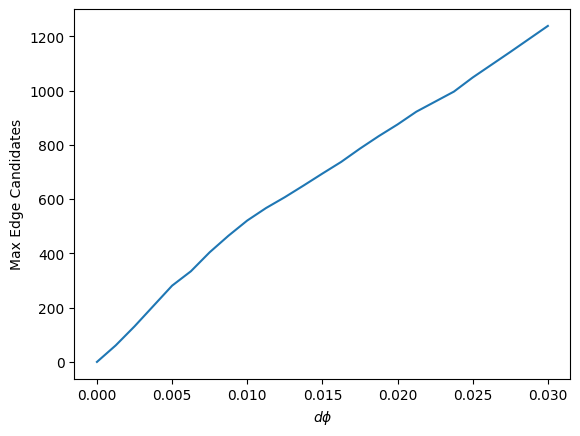

In [121]:
plt.plot(dphi_max, results[:, -1])
plt.xlabel('$d\phi$')
plt.ylabel('Max Edge Candidates')

Text(0.5, 1.0, 'Max Edge Candidates when $d\\phi_{max}$=0.03')

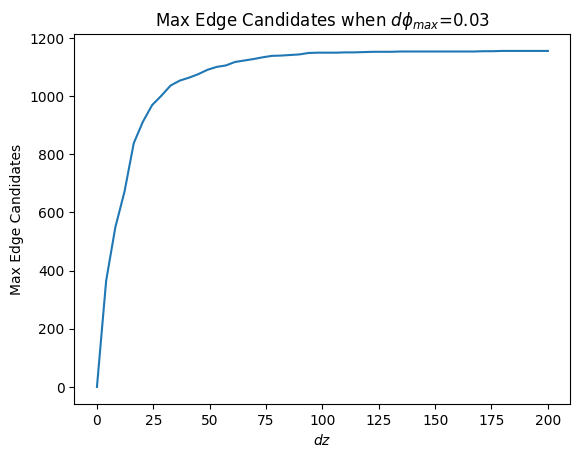

In [297]:
plt.plot(dz_max, results[-1])
plt.xlabel('$dz$')
plt.ylabel(f'Max Edge Candidates')
plt.title(r'Max Edge Candidates when $d\phi_{max}$=' + f'{dphi_max[-1]}')

In [55]:
results[-1]

array([  0., 342., 410., 448., 467., 494., 515., 531., 535., 539., 547.,
       552., 559., 562., 568., 570., 571., 571., 571., 571., 571., 571.,
       571., 571., 571.])